In [1]:
!pip install numpy scipy scikit-learn matplotlib pandas quandl

In [2]:
import pandas as pd
import quandl

df = quandl.get('WIKI/GOOGL')

print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [3]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]

In [4]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0

In [5]:
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [6]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.441017    0.324968   44659000.0
2004-08-20   54.322689  8.537313    7.227007   22834300.0
2004-08-23   54.869377  4.062357   -1.227880   18256100.0
2004-08-24   52.597363  7.753210   -5.726357   15247300.0
2004-08-25   53.164113  3.966115    1.183658    9188600.0


In [7]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))

In [9]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [10]:
df.dropna(inplace=True)

In [11]:
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])

/var/folders/4d/b2yqq1z948ddr04glcpfpvn00000gn/T/ipykernel_80464/3704626254.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


In [12]:
X = preprocessing.scale(X)
y = np.array(df['label'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
clf = svm.SVR()

In [15]:
clf.fit(X_train, y_train)

SVR()

In [16]:
confidence = clf.score(X_test, y_test)

In [17]:
print(confidence)

0.79813541016336


In [18]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9782816318843642

In [19]:
for k in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k, confidence)

linear 0.9771645926924609
poly 0.6604971071561803
rbf 0.79813541016336
sigmoid 0.8937159016203345


In [21]:
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
y_lately = y[-forecast_out:]
X = X[:-forecast_out]
y = y[:-forecast_out]

df.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.9767862881610074


/var/folders/4d/b2yqq1z948ddr04glcpfpvn00000gn/T/ipykernel_80464/754151349.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


In [22]:
forecast_set = clf.predict(X_lately)

In [23]:
print(forecast_set, confidence, forecast_out)

[1082.18055778 1096.47656769 1110.10240923 1104.90368824 1098.46066254
 1096.31845644 1094.99420545 1091.1441682  1085.33394632 1080.83654675
 1079.03396673 1097.43135344 1116.04595411 1121.53912961 1136.20154442
 1140.5033793  1138.69392888 1136.43677859 1138.15765077 1155.75070258
 1155.34840707 1164.97127081 1161.63523332 1170.00545478 1189.7704247
 1203.11085867 1196.85033903 1209.00096305 1213.62409983 1213.24320197
 1203.99155417 1208.84091133 1207.62564423 1142.84092672 1086.93177162] 0.9767862881610074 35


In [24]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

In [25]:
style.use('ggplot')

In [26]:
df['Forecast'] = np.nan

In [27]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [29]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

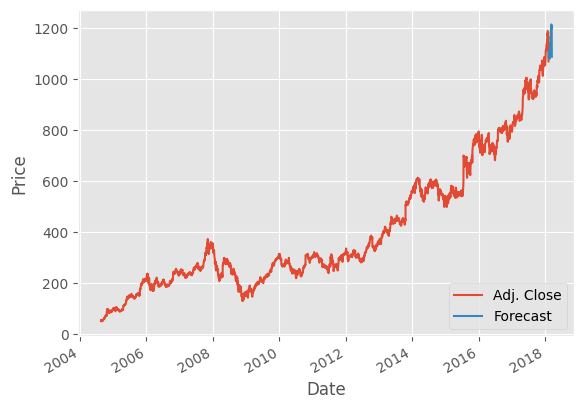

In [30]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()